<a href="https://colab.research.google.com/github/Nishin-10/Nishin-10/blob/main/Q_learning_reinforcement%20_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install or upgrade the gym library
!pip install gymnasium numpy matplotlib

In [3]:
!apt-get install -y xvfb > /dev/null 2>&1
!pip install pyvirtualdisplay gymnasium matplotlib seaborn > /dev/null

url: https://gymnasium.farama.org/environments/toy_text/frozen_lake/

Episode 100: Average reward = 0.00
Episode 200: Average reward = 0.00
Episode 300: Average reward = 0.00
Episode 400: Average reward = 0.00
Episode 500: Average reward = 0.00
Episode 600: Average reward = 0.00
Episode 700: Average reward = 0.00
Episode 800: Average reward = 0.00
Episode 900: Average reward = 0.00
Episode 1000: Average reward = 0.00
Episode 1100: Average reward = 0.00
Episode 1200: Average reward = 0.00
Episode 1300: Average reward = 0.00
Episode 1400: Average reward = 0.00
Episode 1500: Average reward = 0.00
Episode 1600: Average reward = 0.00
Episode 1700: Average reward = 0.00
Episode 1800: Average reward = 0.00
Episode 1900: Average reward = 0.00
Episode 2000: Average reward = 0.00


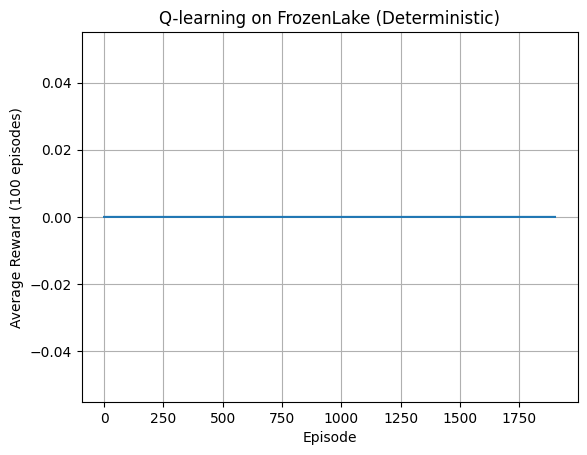

Final Q-Table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [2]:
# Q-learning on FrozenLake-v1 (4x4, deterministic)

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Create deterministic FrozenLake environment
env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=False)

# Initialize Q-table
state_size = env.observation_space.n
action_size = env.action_space.n
Q = np.zeros((state_size, action_size))

# Hyperparameters
alpha = 0.8
gamma = 0.95
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.995
episodes = 2000
max_steps = 100

# Training with Q-learning
rewards = []

for episode in range(episodes):
    state, _ = env.reset()
    total_reward = 0

    for _ in range(max_steps):
        # ε-greedy strategy
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])

        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        # Q-learning update
        Q[state, action] = Q[state, action] + alpha * (
            reward + gamma * np.max(Q[next_state]) - Q[state, action]
        )

        state = next_state
        total_reward += reward

        if done:
            break

    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    rewards.append(total_reward)

    # Progress log
    if (episode + 1) % 100 == 0:
        avg = np.mean(rewards[-100:])
        print(f"Episode {episode + 1}: Average reward = {avg:.2f}")

# Plot average reward over episodes
plt.plot(np.convolve(rewards, np.ones(100)/100, mode='valid'))
plt.title("Q-learning on FrozenLake (Deterministic)")
plt.xlabel("Episode")
plt.ylabel("Average Reward (100 episodes)")
plt.grid(True)
plt.show()

# Display final Q-table
print("Final Q-Table:")
print(np.round(Q, 2))


Learned Policy (Symbols):
[['←' '←' '←' '←']
 ['←' '←' '←' '←']
 ['←' '←' '←' '←']
 ['←' '←' '←' '←']]


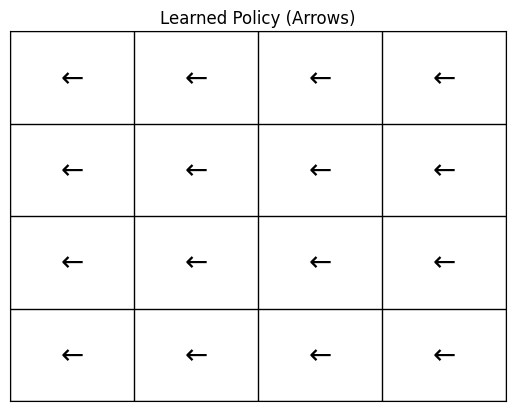

In [4]:
# Show best action for each state
action_symbols = ['←', '↓', '→', '↑']
policy = np.argmax(Q, axis=1)
policy_grid = np.array([action_symbols[a] for a in policy]).reshape(4, 4)

print("Learned Policy (Symbols):")
print(policy_grid)

# Plot policy as arrows on grid
fig, ax = plt.subplots()
for i in range(4):
    for j in range(4):
        ax.text(j, i, policy_grid[i, j], ha='center', va='center', fontsize=20)
ax.set_xticks(np.arange(4))
ax.set_yticks(np.arange(4))
ax.set_xticks(np.arange(4 + 1) - 0.5, minor=True)
ax.set_yticks(np.arange(4 + 1) - 0.5, minor=True)
ax.grid(which='minor', color='black', linestyle='-', linewidth=1)
ax.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
plt.title("Learned Policy (Arrows)")
plt.show()


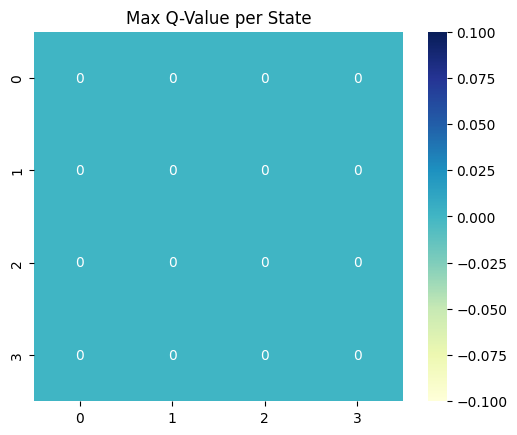

In [5]:
# Heatmap of max Q-values per state
max_q = np.max(Q, axis=1).reshape(4, 4)
sns.heatmap(max_q, annot=True, cmap="YlGnBu", square=True)
plt.title("Max Q-Value per State")
plt.show()


In [6]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

In [7]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import display as ipydisplay, clear_output

# Create env with rgb_array render mode
env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=False, render_mode="rgb_array")

state, _ = env.reset()
done = False
frames = []

for _ in range(50):
    action = np.argmax(Q[state])
    state, reward, terminated, truncated, _ = env.step(action)
    frame = env.render()
    frames.append(frame)
    if terminated or truncated:
        break

env.close()

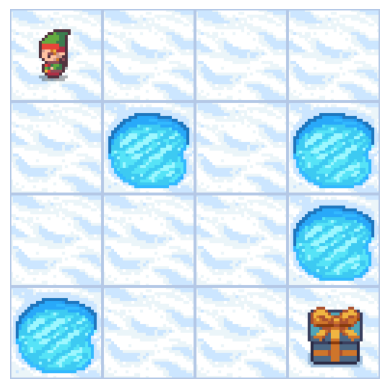

In [ ]:
for frame in frames:
    plt.imshow(frame)
    plt.axis('off')
    clear_output(wait=True)
    ipydisplay(plt.gcf())
    time.sleep(0.5)